# First Make csv data

In [ ]:
import os
from google.colab import drive

drive.mount("/content/drive")

# shared path to drive
SHARED_PATH = "/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours"
# direct path to drive
DIRECT_PATH = "/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours"

# Determine the data path based on the existence of shared or direct paths
root_path = (
    SHARED_PATH
    if os.path.exists(SHARED_PATH)
    else DIRECT_PATH
    if os.path.exists(DIRECT_PATH)
    else None
)

DATA_PATH = ""
# Print the chosen path or an error message
if root_path:
    DATA_PATH = root_path + "/Proj1_CGC_Building_with_sides_classify"
    print(f"Using path: {root_path}\n\n{os.listdir(DATA_PATH)}")
else:
    print("Neither shared nor direct path exists. Please check the paths.")


Mounted at /content/drive
Using path: /content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours

['validate_images', 'training_images', 'ALL_IMG_DATA', 'no_side_one_output_classify', 'ALL_IMG_DATA.csv', 'make_train-test-split_from_all_img_data.ipynb', 'RUN_THIS_all_in_1_changable_parameter_(2_output).ipynb', 'ResNet18(ptrain)_2-output_accy-70_(lr-0.0001_bs-32_ep-5_sd-2025).pth', 'final_project_1.ipynb']


In [ ]:
import pandas as pd
from IPython.display import display

root_dir = DATA_PATH + "/ALL_IMG_DATA"
image_dict = {}
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path):
        image_dict[folder] = []
        for filename in os.listdir(folder_path):
            # if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            rel_path = folder_path.split("/")
            image_path = os.path.join("/", rel_path[-2], rel_path[-1], filename)
            image_dict[folder].append(image_path)

data = []
for folder_name, images in image_dict.items():
    print(f"Class: {folder_name}")
    class_name = folder_name.split("_")[0]
    subclass_name = folder_name.split("_")[1]
    for img_path in images:
        data.append({"path": img_path, "class": class_name, "subclass": subclass_name})

df = pd.DataFrame(data)

# print(image_dict.keys)
# print(data)
display(df)
print(df.describe())

Class: gurudeb_front
Class: heritage_front
Class: gurudeb_right
Class: gurudeb_left
Class: admin_front
Class: admin_left
Class: admin_right
Class: heritage_left
Class: chemistry_front
Class: chemistry_right
Class: chemistry_left


,path,class,subclass
0,/ALL_IMG_DATA/gurudeb_front/gurudeb_005.jpeg,gurudeb,front
1,/ALL_IMG_DATA/gurudeb_front/gurudeb_004.jpeg,gurudeb,front
2,/ALL_IMG_DATA/gurudeb_front/frame_0210.jpg,gurudeb,front
3,/ALL_IMG_DATA/gurudeb_front/gurudeb_002.jpeg,gurudeb,front
4,/ALL_IMG_DATA/gurudeb_front/gurufront_00040.jpeg,gurudeb,front
...,...,...,...
361,/ALL_IMG_DATA/chemistry_left/chemleft_00024.jpeg,chemistry,left
362,/ALL_IMG_DATA/chemistry_left/chemleft_00025.jpeg,chemistry,left
363,/ALL_IMG_DATA/chemistry_left/chemleft_00026.jpeg,chemistry,left
364,/ALL_IMG_DATA/chemistry_left/chemleft_00027.jpeg,chemistry,left


                                                path      class subclass
count                                            366        366      366
unique                                           366          4        3
top     /ALL_IMG_DATA/chemistry_left/images (2).jpeg  chemistry    front
freq                                               1        112      146


In [ ]:
# save csv data
df.to_csv(DATA_PATH + "/ALL_IMG_DATA.csv", index=False)
os.listdir(DATA_PATH)

['validate_images',
 'training_images',
 'ALL_IMG_DATA',
 'no_side_one_output_classify',
 'ALL_IMG_DATA.csv',
 'make_train-test-split_from_all_img_data.ipynb',
 'RUN_THIS_all_in_1_changable_parameter_(2_output).ipynb',
 'ResNet18(ptrain)_2-output_accy-70_(lr-0.0001_bs-32_ep-5_sd-2025).pth',
 'final_project_1.ipynb']

In [ ]:
# Group by 'subclass' and 'class', then count the occurrences
df_2dhist = df.groupby("subclass")["class"].value_counts()
print(df_2dhist)

# Unstack the multi-index to get the desired DataFrame format
df_2dhist = df_2dhist.unstack(level="subclass")

display(df_2dhist)
# Fill NaN values with 0 and convert the data type to integer
df_2dhist = df_2dhist.fillna(0).astype(int)

subclass  class    
front     gurudeb      41
          chemistry    40
          admin        34
          heritage     31
left      chemistry    35
          heritage     32
          admin        27
          gurudeb      27
right     chemistry    37
          admin        32
          gurudeb      30
Name: count, dtype: int64


subclass,front,left,right
class,,,
admin,34.0,27.0,32.0
chemistry,40.0,35.0,37.0
gurudeb,41.0,27.0,30.0
heritage,31.0,32.0,NaN


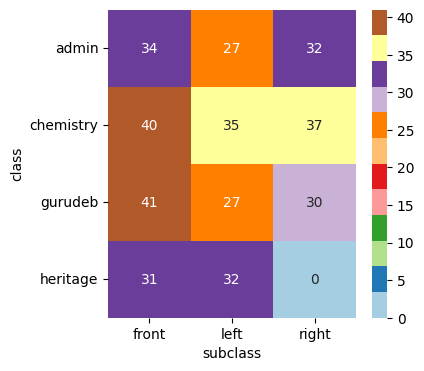

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(figsize=(4, 4))

# Use 'd' format specifier for integer counts in annotations
sns.heatmap(df_2dhist, cmap="Paired", annot=True, fmt="d")
plt.xlabel("subclass")
_ = plt.ylabel("class")
plt.yticks(rotation=0)
plt.show()  # Add plt.show() to display the plot

In [ ]:
from sklearn.model_selection import train_test_split

# splitting a dataset in such a way that the proportion of samples in each class is the same across the training and testing sets.
train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df["class"]
)

print("------------", len(train_df), "----------------")
display(train_df.head())
print("------------", len(test_df), "----------------")
display(test_df.head())

# save train and test data csv
# train_df.to_csv(DATA_PATH+'/training_df.csv', index=False)
# test_df.to_csv(DATA_PATH+'/validate_df.csv', index=False)

------------ 292 ----------------


,path,class,subclass
308,/ALL_IMG_DATA/chemistry_right/chemright00026.jpeg,chemistry,right
7,/ALL_IMG_DATA/gurudeb_front/gurufront_00042.jpeg,gurudeb,front
347,/ALL_IMG_DATA/chemistry_left/chemleft_0006.jpeg,chemistry,left
345,/ALL_IMG_DATA/chemistry_left/chemleft_0001.jpeg,chemistry,left
161,/ALL_IMG_DATA/admin_front/adm_main_0002.jpeg,admin,front


------------ 74 ----------------


,path,class,subclass
254,/ALL_IMG_DATA/chemistry_front/chem_fr_00040.jpeg,chemistry,front
166,/ALL_IMG_DATA/admin_left/adm_out_00016.jpg,admin,left
70,/ALL_IMG_DATA/heritage_front/heri_front_0002.jpg,heritage,front
203,/ALL_IMG_DATA/admin_right/frame_0112.jpg,admin,right
361,/ALL_IMG_DATA/chemistry_left/chemleft_00024.jpeg,chemistry,left
